# **Downlaoding Necessary Packages**

# **Importing Dependencies for the Project**

In [1]:
import numpy as np                           #python package for dealing with arrays
import pandas as pd                          #python package for data analysis
#python packages for data visualization
import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt
import neattext as nt                       #python package for text cleaning
import spacy                                #premium python package for text analysis
nlp=spacy.load("en_core_web_sm")            #importing spacy small model that helps in text analysis

# Setting environment to ignore future warnings
import warnings
warnings.simplefilter('ignore')

# Changing default pandas setting to custom
from matplotlib.pylab import rcParams
rcParams["figure.figsize"] = (14, 7)
%matplotlib inline

# **Reading the Data Using Google Colab**

In [2]:
import io
# women_df= pd.read_excel(io.BytesIO(uploaded['Women\'s_Clothing_E-Commerce_Reviews.xlsx']))
women_df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

# **Sample of the Data**

In [3]:
women_df.head(3)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses


# **Shape of the Data**

In [4]:
women_df.shape
# rows=23486
# columns=11

(23486, 11)

# **Percentaged of Missing Values in the Data**

<AxesSubplot: title={'center': 'Missing Value Columns'}, ylabel='% missing'>

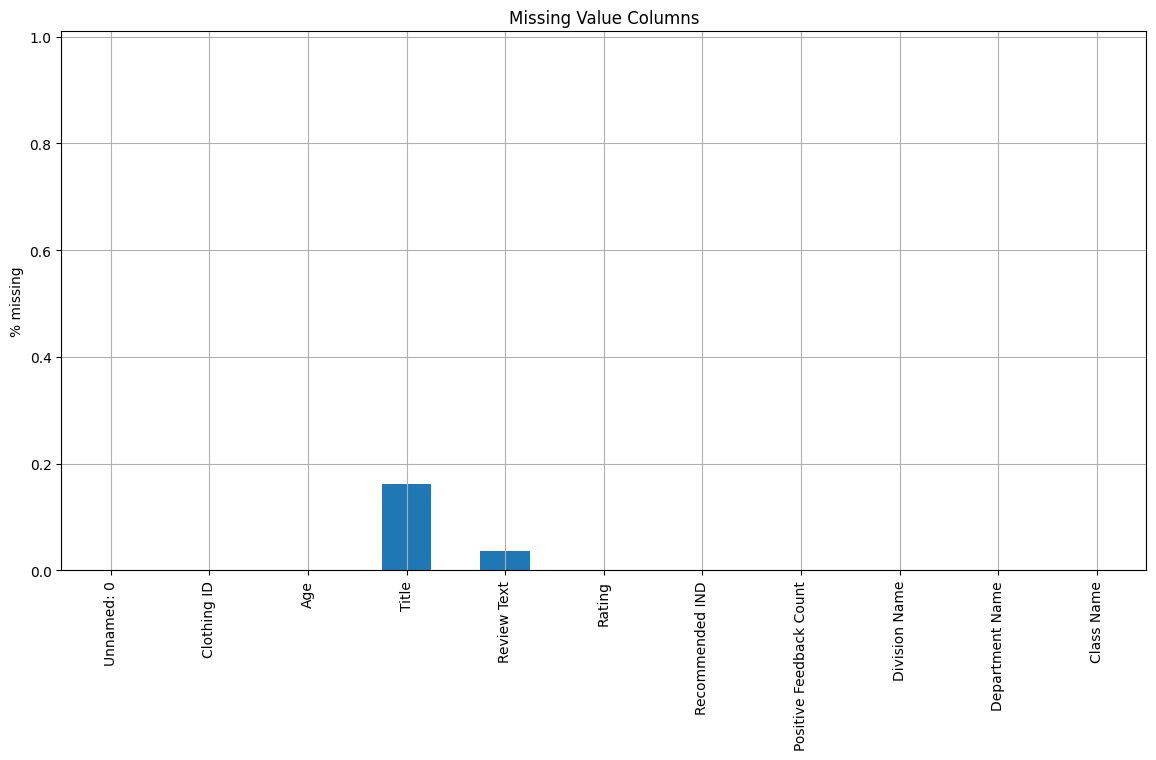

In [5]:
missing_percent = women_df.isna().sum(axis=0)
missing_percent = missing_percent/women_df.shape[0]
missing_percent.plot(kind='bar',title = 'Missing Value Columns',ylabel = '% missing', ylim = (0,1.01),grid = True)

In [6]:
# percentage of null values are very small to that we can remove them

# **Removing Null Values**

In [7]:
women_df=women_df.dropna(axis=0)

In [8]:
women_df.isnull().sum()

Unnamed: 0                 0
Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

# **Generalize Code for Various Visualizations**

In [10]:
def make_plots(feature, title="", limited=False, n=10):
    # print("Total unique values are: ", len(feature.value_counts()), "\n\n")
    # print("Category\tValue\n")
    if limited:
        data = feature.value_counts()[0:n]
    else:
        data = feature.value_counts()
    # print(data)
    categories_num = len(data)
    #plotting bar-plot and pie chart
    # sns.set_style('darkgrid')
    plt.figure(figsize=(26,5))
    plt.subplot(1,2,1)
    plt.title(title, fontsize=16)
    plt.xticks(rotation=45)
    plot = sns.barplot(x=data.index, y=data.values, edgecolor="white", palette=sns.palettes.color_palette("icefire"))
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.08
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y), size = 12)
    
    plt.subplot(1,2,2)
    labels = data.index
    plt.pie(x=data, autopct="%.1f%%", explode=[0.02]*categories_num, labels=labels, pctdistance=0.5)
    plt.title(title, fontsize=16)
    plt.show()

# **Age Distribution**

In [11]:
women_df['Age'].value_counts()

39    1103
35     728
34     669
36     664
38     658
      ... 
93       2
99       1
92       1
94       1
87       1
Name: Age, Length: 77, dtype: int64

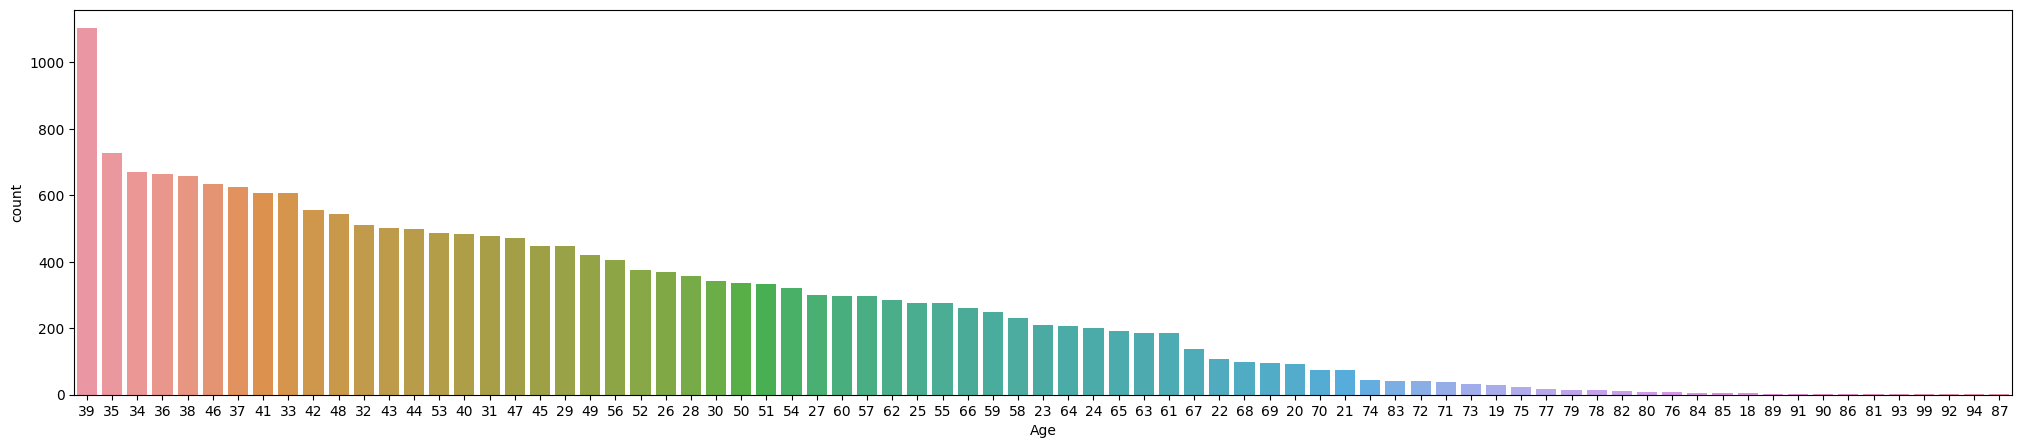

In [12]:
plt.figure(figsize=(25, 5))
sns.countplot(x='Age', data=women_df, order=women_df.Age.value_counts().index)
plt.show()

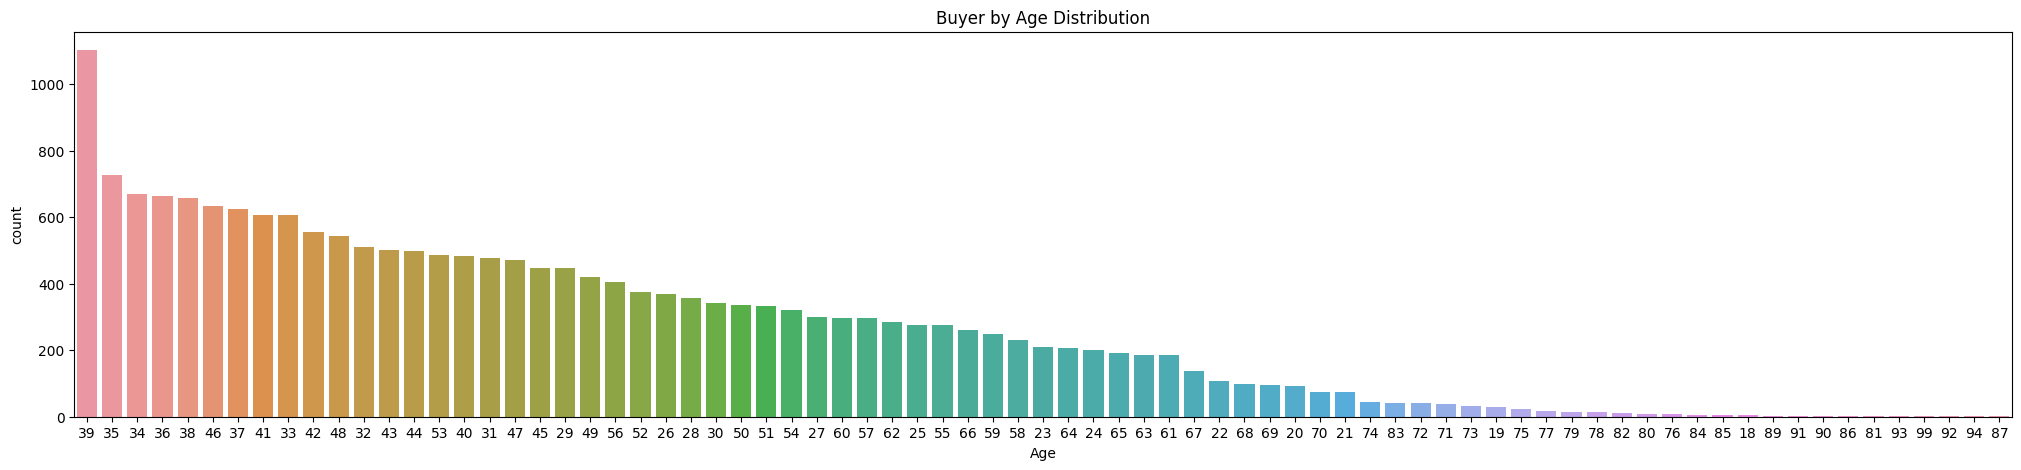

In [13]:
plt.figure(figsize=(25,5))
sns.countplot(x = 'Age', data = women_df, order = women_df['Age'].value_counts().index)
plt.title("Buyer by Age Distribution")
plt.show()

In [14]:
#our store is targeting people of age 19 to 80+; Our most of sellings are to people age of between 30-50. It means our products are mostly utilized by Adults.
#if someone wants to increase its sales he/should focus on teens and people below 30. The reason is that people of these age groups have more buying potential.

# **Majority of the Products are Recommended by Customers of all Age Groups**

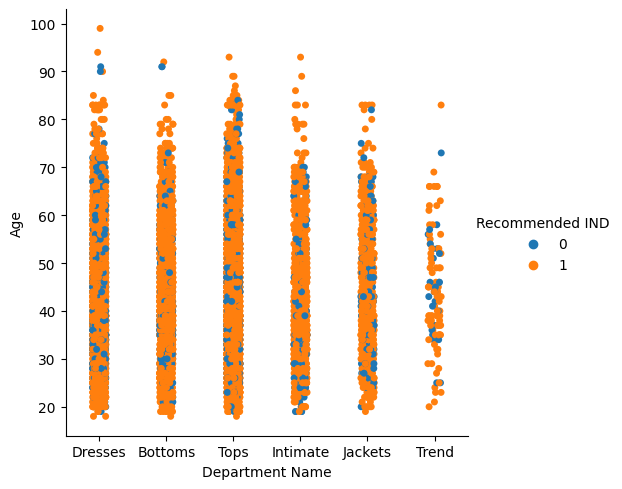

In [15]:
sns.catplot(x="Department Name", y="Age", hue="Recommended IND",data= women_df)
plt.show()
#this visualization is telling that in each department we have significant number of recommnedations by all the age gropus. This very good for our store. I think there is no
# improvement required here

# **Highly Recommended Products By Rating**

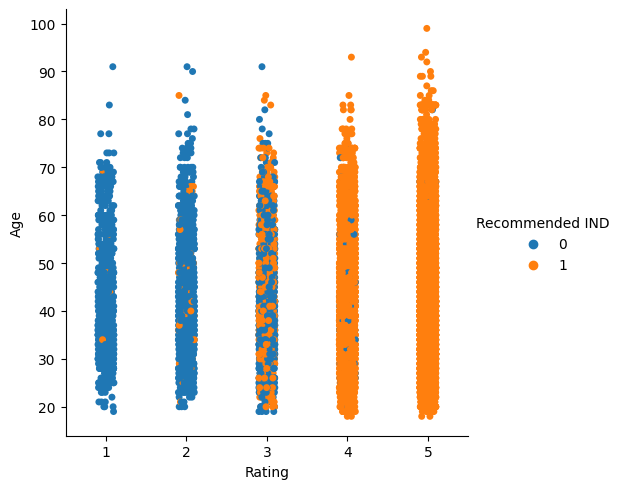

In [16]:
sns.catplot(x="Rating", y="Age", hue="Recommended IND",data= women_df)
plt.show()
# Here you can see that most of the recommendations by all the consumers to those products have 4-5 ratings. It is natural good products will be recommended. 
# The Store owners should focus on quality products and try to increase 5 stars rating.
# Products rated 1 and 2 are almost non-recommended by all the customers, while products rated 4 and 5 are nearly recommended by all the customers.

# **Which Department is Highly Recommended?**

In [19]:
women_df['Class Name'].unique()

array(['Dresses', 'Pants', 'Blouses', 'Knits', 'Intimates', 'Outerwear',
       'Lounge', 'Sweaters', 'Skirts', 'Fine gauge', 'Sleep', 'Jackets',
       'Swim', 'Trend', 'Jeans', 'Shorts', 'Legwear', 'Layering',
       'Casual bottoms', 'Chemises'], dtype=object)

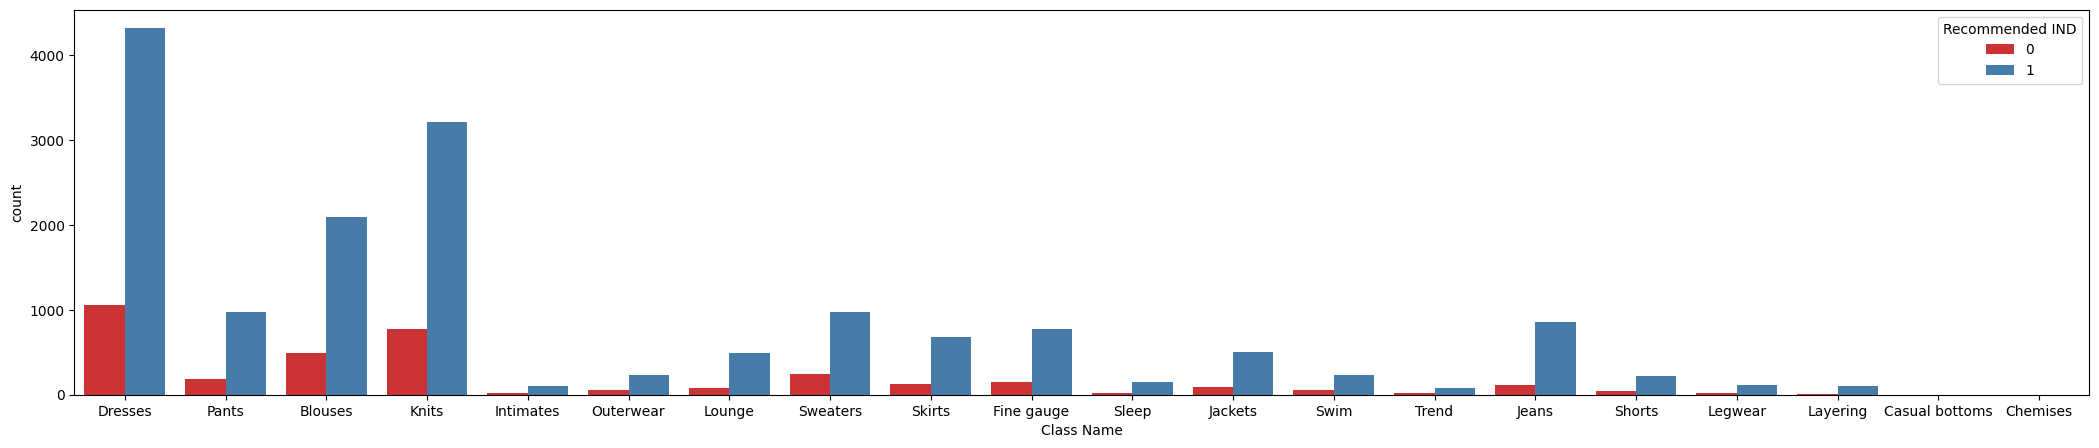

In [20]:
plt.figure(figsize=(26,5))
sns.countplot(data=women_df, x='Class Name', hue='Recommended IND',  palette = "Set1")
plt.show()
#four classes "Dresses", "Pants","Blouese","Knits" have the highest recommendations among other departments. One who is wishing to increase its sales should pay attention
# to other departments, especially in the "Trend" class, today is the era of technology and everyone is in touch with one another. They try to follow  Trending items and dressed up
# according to current fashion. Age can be one factor for low sales in Trend Class

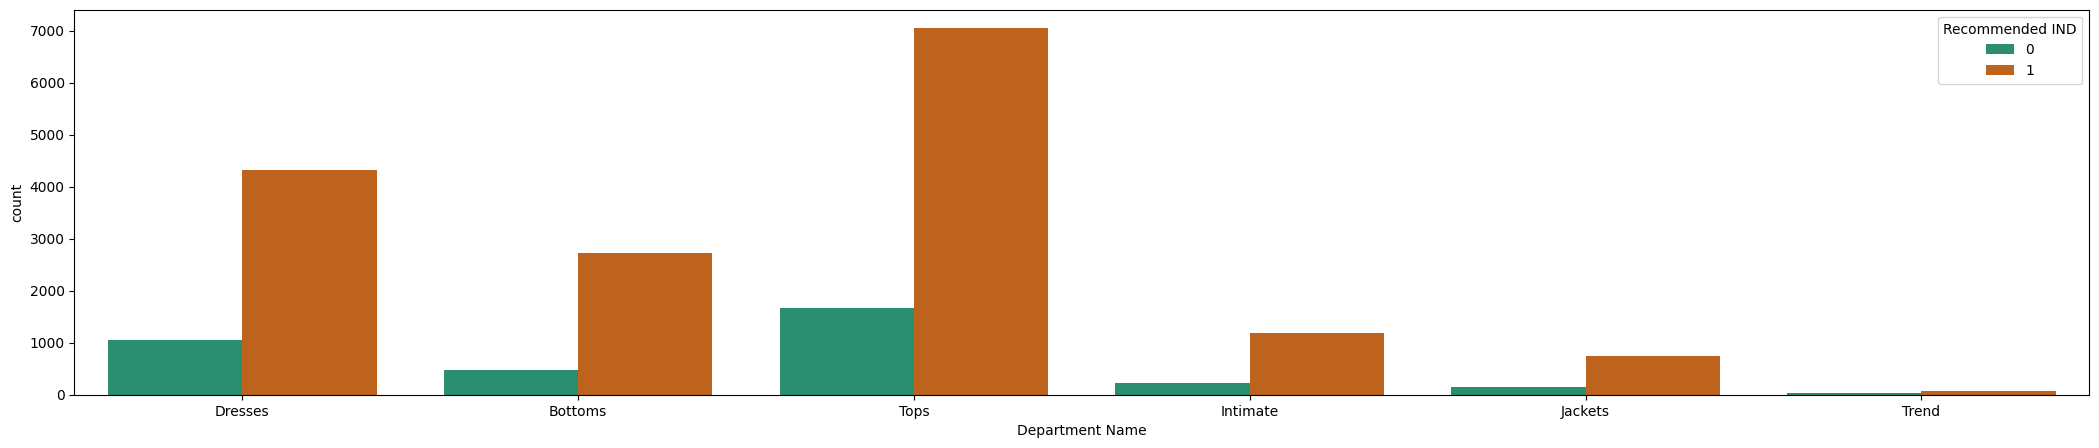

In [33]:
plt.figure(figsize=(26,5))
sns.countplot(data=women_df, x='Department Name' , hue='Recommended IND',palette = "Dark2")
plt.show()

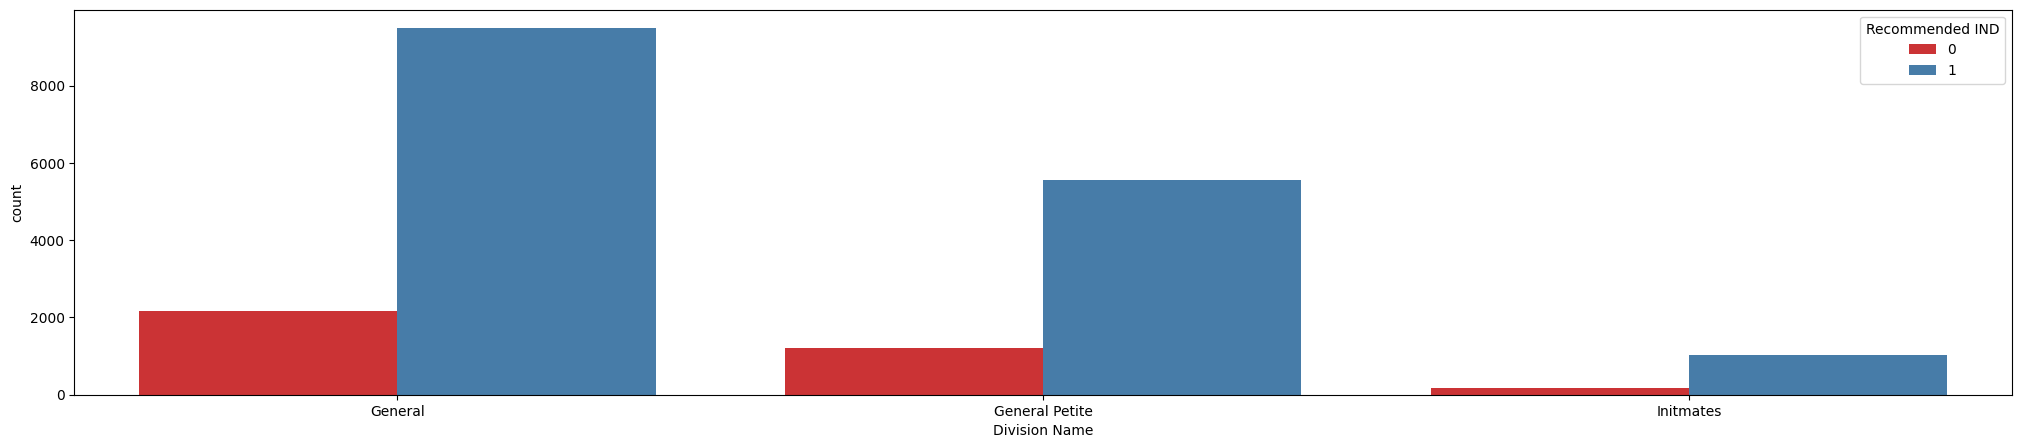

In [30]:
plt.figure(figsize=(25,5))
sns.countplot(data=women_df, x='Division Name', hue='Recommended IND', palette = "Set1")
plt.show()
# Intimate Division has the lowest recommendations as compared to other divisions. General Division stands out in this competition. One reason is most of our sellings are to people
# above age 30 and intimate products mostly used below 30. Due to less selling to below 30, these Intimate figures are short. 

# **Most Sellings Department**

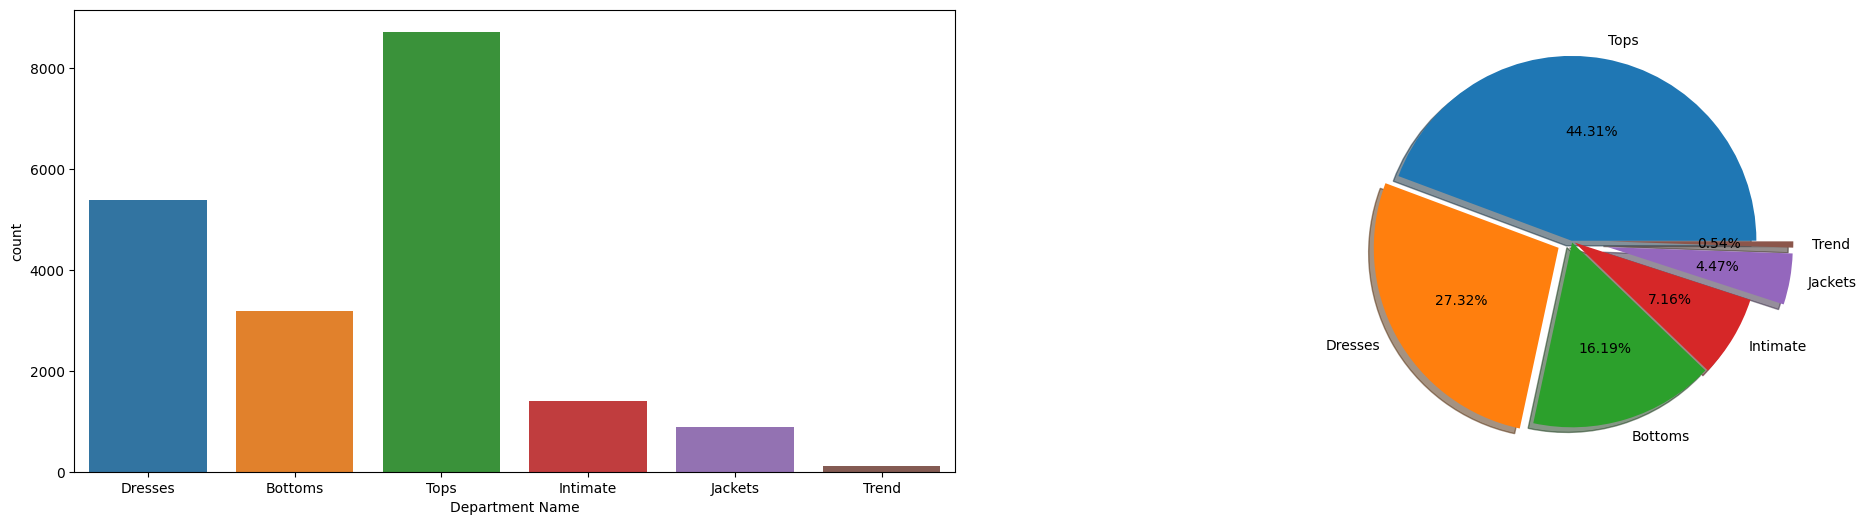

In [37]:
plt.figure(figsize = (25, 6))
plt.subplot(1, 2, 1)
# sns.countplot(x = women_df['Department Name'], data = women_df)
sns.countplot(x ='Department Name', data = women_df)

plt.subplot(1, 2, 2)
plt.pie(x=women_df['Department Name'].value_counts() ,labels=('Tops','Dresses',"Bottoms","Intimate","Jackets","Trend") ,explode = (0, 0.08, 0.01,0.02,0.2,0.2), shadow = True, autopct = '%1.2f%%')
plt.show()

#Tops deparments taking lead in selling point of view. "Bottoms" and "Dresses" come on position 2 and three. Most of our sales are in jewllery items.


In [39]:
women_df['Rating'].value_counts()

5    10858
4     4289
3     2464
2     1360
1      691
Name: Rating, dtype: int64

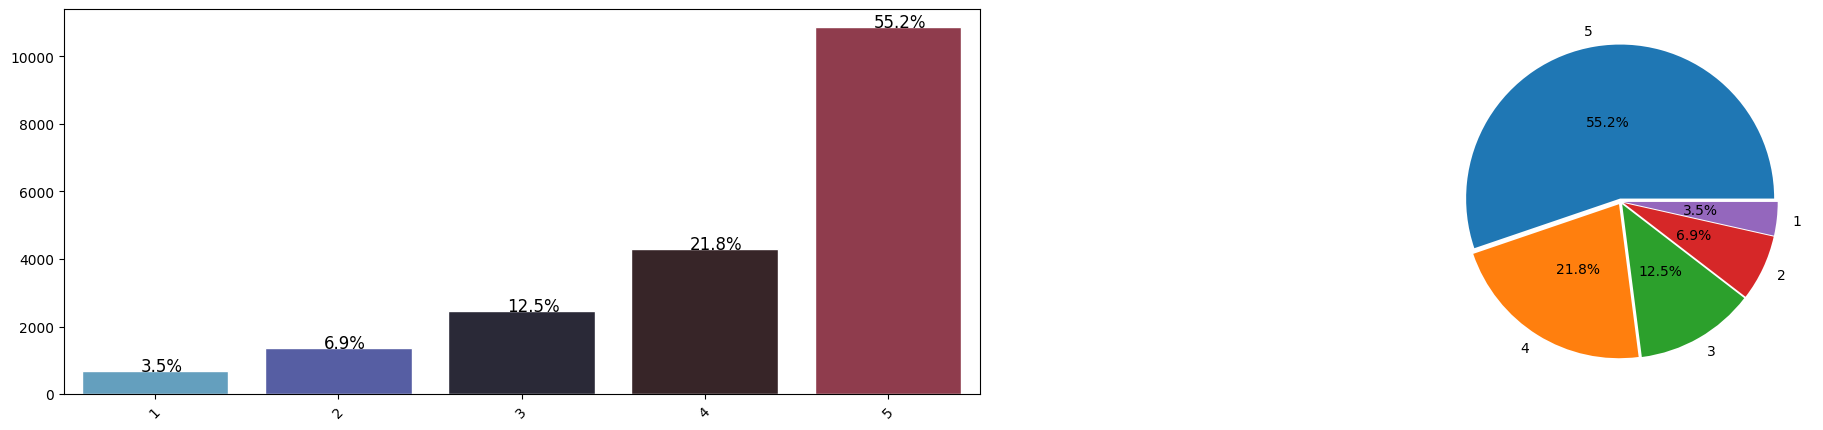

In [38]:
make_plots(women_df['Rating'])
#here point of concern comes, about 55% produts are rated as 5-star and 21% as 4-star. 5 and 4 stars cover 76% of selling. This figure in not perfect for us.
# It would be 90% or above. Store owner have to review its products that delivering to customers and should enhance their quality and user experienence

# **Text Analysis**

In [44]:
import neattext as nt

In [45]:
def pre_cleaning(text):
    text=nt.fix_contractions(text)
    text=nt.remove_puncts(text)
    text=nt.remove_bad_quotes(text)
    text=nt.remove_emojis(text)
    text=nt.remove_numbers(text)
    text=nt.remove_accents(text)
    text=nt.remove_multiple_spaces(text)
    text=nt.remove_non_ascii(text)
    text=nt.remove_userhandles(text)
    return text

In [47]:
women_df['Pre_Cleaned_Reviews']=women_df['Review Text'].apply(lambda x:pre_cleaning(str(x)))

# **Sentiment Analysis**

In [52]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer  #package for sentiment analysis
sent_anal_obj = SentimentIntensityAnalyzer()

# **Calculating Sentiment Score (1,-1) [1, Extremely Postive] [-1, Extremely Negative]**

In [54]:
#method for calculating Sentiment Score
def sentiment_score(my_text):
    sentimnent_dict=sent_anal_obj.polarity_scores(str(my_text))
    return sentimnent_dict['compound']

In [55]:
women_df['Sentiment_Score']=women_df['Pre_Cleaned_Reviews'].apply(lambda x:sentiment_score(x))

##Assigning Sentiment Tags [Sentiment Score >= 0.05(positive)] [Sentiment Score <= - 0.05(Negative)] [Remaing(Neutral)]

In [57]:
#method for assigning semtiment tag according to polarity
def sentiment_tag(polarity):
    if polarity >= 0.05 :
        return "Positive"
    elif polarity <= - 0.05:
        return "Negative"
    else:
        return "Neutral"

In [58]:
women_df['Sentiment Tag']=women_df['Sentiment_Score'].apply(lambda x:sentiment_tag(x))

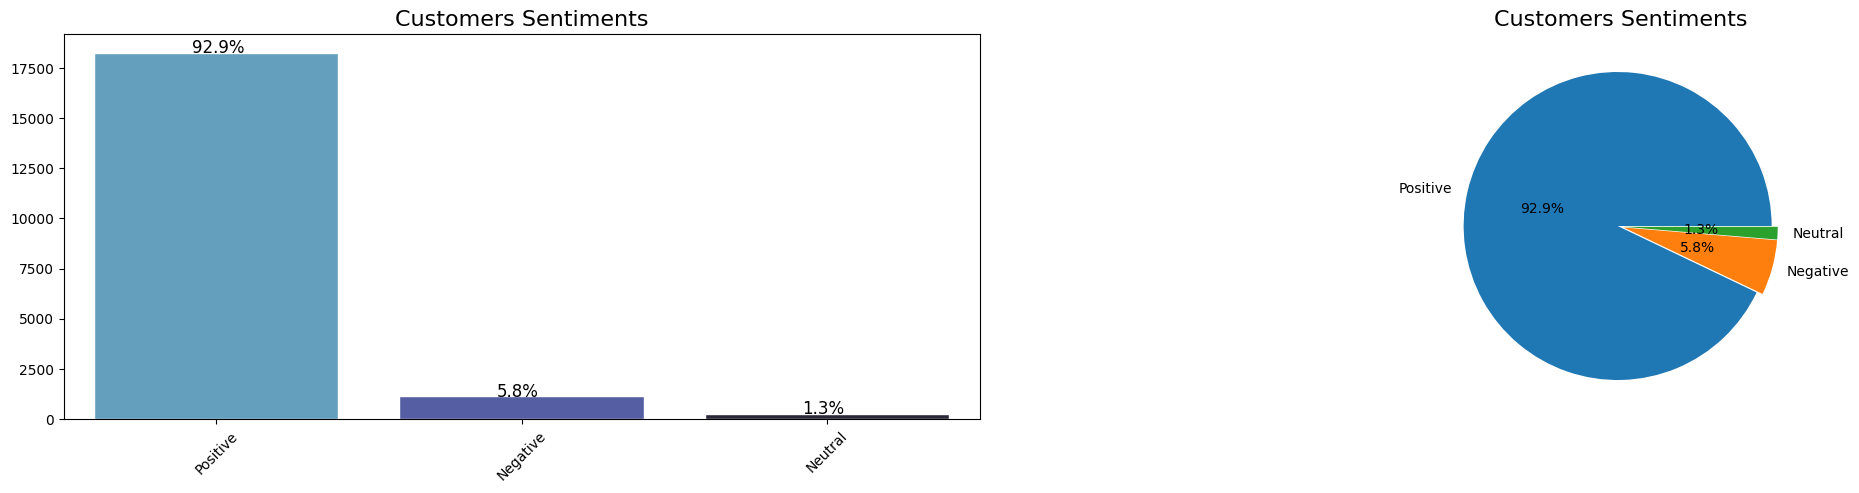

In [64]:
make_plots(women_df['Sentiment Tag'],'Customers Sentiments')
#Stunning: Above 90% reviews are postive

# **Emotion of Customers on our Products**

In [67]:
! pip install transformers -q
from transformers import pipeline
emotion = pipeline('sentiment-analysis', model='arpanghoshal/EmoRoBERTa')   #downloading hugging face pre-trained model for emotions detection: It can detect 28 emotions


[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip
All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at arpanghoshal/EmoRoBERTa.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


In [68]:
women_df['Emotions']=women_df['Pre_Cleaned_Reviews'][0:100].apply(emotion)

In [69]:
def extract_em(em_dict):
    return em_dict[0]['label'] 
  # print(em_dict[0]['label'])

In [72]:
women_df['Emotions_Label']=women_df['Emotions'][0:100].apply(lambda x:extract_em(x))

# **Aspect Based Sentiment Analysis**

In [91]:
# code for finding aspect of customer review
def ABSA(text):
		doc=nlp(text) #split text into tokens
		descriptive_term = ''
		target = ''
		for token in doc:
			if token.dep_ == 'nsubj' and token.pos_ == 'NOUN': #checking the dependency relation of token is nsubj(subject of the sentence) and pos(part of speech) is Noun
				target = token.text
			if token.pos_ == 'ADJ':
				prepend = '' 
				for child in token.children:
					if child.pos_ != 'ADV':
						continue
					prepend += child.text + ' '
					descriptive_term = prepend + token.text
		return target+" "+descriptive_term

In [92]:
women_df['Aspects']=women_df['Pre_Cleaned_Reviews'][0:100].apply(lambda x:ABSA(x))

In [93]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', 500)

In [94]:
women_df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Pre_Cleaned_Reviews,Sentiment_Score,Sentiment Tag,Emotions,Emotions_Label,Aspects
2,2,1077,60,Some major design flaws,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - ...",3,0,0,General,Dresses,Dresses,i had such high hopes for this dress and really wanted it to work for me i initially ordered the petite small (my usual size) but i found this to be outrageously small so small in fact that i could not zip it up i reordered it in petite medium which was just ok overall the top half was comfortable and fit nicely but the bottom half had a very tight under layer and several somewhat cheap (net) over layers imo a major design flaw was the net over layer sewn directly into the zipper it c,0.9398,Positive,"[{'label': 'nervousness', 'score': 0.33345910906791687}]",nervousness,flaw somewhat cheap
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants,i love love love this jumpsuit it is fun flirty and fabulous every time i wear it i get nothing but great compliments,0.4805,Positive,"[{'label': 'love', 'score': 0.8078617453575134}]",love,
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses,this shirt is very flattering to all due to the adjustable front tie it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan love this shirt,0.9162,Positive,"[{'label': 'love', 'score': 0.8262706398963928}]",love,cardigan very flattering
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress.",2,0,4,General,Dresses,Dresses,i love tracy reese dresses but this one is not for the very petite i am just under feet tall and usually wear a p in this brand this dress was very pretty out of the package but its a lot of dress the skirt is long and very full so it overwhelmed my small frame not a stranger to alterations shortening and narrowing the skirt would take away from the embellishment of the garment i love the color and the idea of the style but it just did not work on me i returned this dress,0.9419,Positive,"[{'label': 'love', 'score': 0.9255039095878601}]",love,skirt very full
6,6,858,39,Cagrcoal shimmer fun,"I aded this in my basket at hte last mintue to see what it would look like in person. (store pick up). i went with teh darkler color only because i am so pale :-) hte color is really gorgeous, and turns out it mathced everythiing i was trying on with it prefectly. it is a little baggy on me and hte xs is hte msallet size (bummer, no petite). i decided to jkeep it though, because as i said, it matvehd everything. my ejans, pants, and the 3 skirts i waas trying on (of which i ]kept all ) oops.",5,1,1,General Petite,Tops,Knits,i aded this in my b

In [95]:
def post_cleaning(text):
    text=nt.remove_stopwords(text)
    text=nt.remove_shortwords(text,3)
    return text

In [96]:
women_df['Post_Cleaned_Reviews']=women_df['Pre_Cleaned_Reviews'].apply(lambda x:post_cleaning(x))

In [98]:
!pip install statsmodels

     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ---------------------------------------- 0.1/9.2 MB 1.3 MB/s eta 0:00:07
      --------------------------------------- 0.2/9.2 MB 1.5 MB/s eta 0:00:07
      --------------------------------------- 0.2/9.2 MB 1.5 MB/s eta 0:00:07
      --------------------------------------- 0.2/9.2 MB 1.5 MB/s eta 0:00:07
      --------------------------------------- 0.2/9.2 MB 692.4 kB/s eta 0:00:13
      --------------------------------------- 0.2/9.2 MB 692.4 kB/s eta 0:00:13
      --------------------------------------- 0.2/9.2 MB 692.4 kB/s eta 0:00:13
      --------------------------------------- 0.2/9.2 MB 551.4 kB/s eta 0:00:17
      --------------------------------------- 0.2/9.2 MB 551.4 kB/s eta 0:00:17
     - -------------------------------------- 0.2/9.2 MB 457.3 kB/s eta 0:00:20
     - -------------------------------------- 0.2/9.2 MB 457.3 kB/


[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [99]:
from colorama import Fore, init, Back, Style   #dependencies for styling word clouds
from wordcloud import WordCloud   #package for creating word clouds
from statsmodels.graphics.mosaicplot import mosaic
# import squarify

# **Words used in Reviews of Specific Ratings**

In [100]:
around_color = "#f6f5f5"
inside_color= "#f6f5f5"
colors = sns.color_palette("ch:s=-.2,r=.6")
fig = plt.figure(figsize=(10,6))
colors = colors
# ax = plt.axes()

<Figure size 1000x600 with 0 Axes>

In [103]:
women_df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Pre_Cleaned_Reviews,Sentiment_Score,Sentiment Tag,Emotions,Emotions_Label,Aspects,Post_Cleaned_Reviews
2,2,1077,60,Some major design flaws,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - ...",3,0,0,General,Dresses,Dresses,i had such high hopes for this dress and really wanted it to work for me i initially ordered the petite small (my usual size) but i found this to be outrageously small so small in fact that i could not zip it up i reordered it in petite medium which was just ok overall the top half was comfortable and fit nicely but the bottom half had a very tight under layer and several somewhat cheap (net) over layers imo a major design flaw was the net over layer sewn directly into the zipper it c,0.9398,Positive,"[{'label': 'nervousness', 'score': 0.33345910906791687}]",nervousness,flaw somewhat cheap,high hopes dress wanted work initially ordered petite small usual size found outrageously small small fact reordered petite medium overall half comfortable nicely half tight layer somewhat cheap layers major design flaw layer sewn directly zipper
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants,i love love love this jumpsuit it is fun flirty and fabulous every time i wear it i get nothing but great compliments,0.4805,Positive,"[{'label': 'love', 'score': 0.8078617453575134}]",love,,love love love jumpsuit flirty fabulous time wear great compliments
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses,this shirt is very flattering to all due to the adjustable front tie it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan love this shirt,0.9162,Positive,"[{'label': 'love', 'score': 0.8262706398963928}]",love,cardigan very flattering,shirt flattering adjustable perfect length wear leggings sleeveless pairs cardigan love shirt
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress.",2,0,4,General,Dresses,Dresses,i love tracy reese dresses but this one is not for the very petite i am just under feet tall and usually wear a p in this brand this dress was very pretty out of the package but its a lot of dress the skirt is long and very full so it overwhelmed my small frame not a stranger to alterations shortening and narrowing the skirt would take away from the embellishment of the garment i love the color and the idea of the style but it just did not work on me i returned this dress,0.9419,Positive,"[{'label': 'love', 'score': 0.9255039095878601}]",love,skirt very full,love tracy reese dresses petite feet tall usually wear brand dress pretty package dress skirt long overwhelmed small frame stranger alterations shorteni

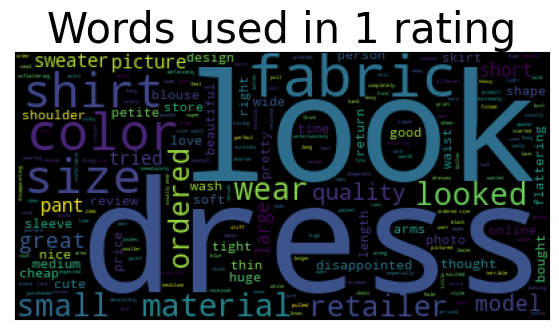

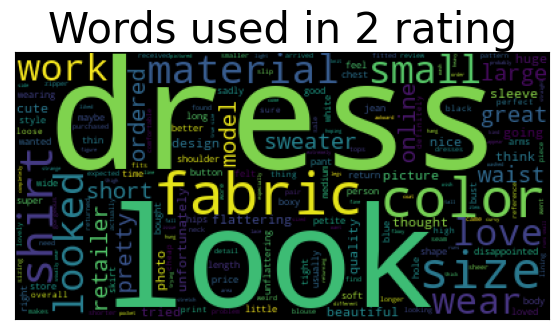

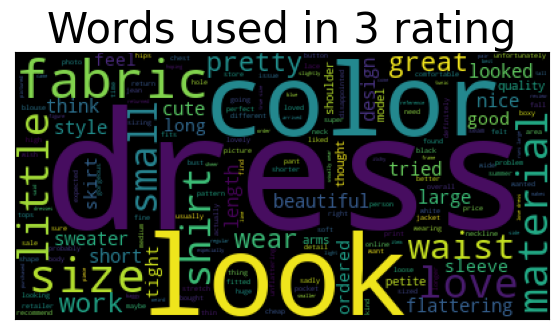

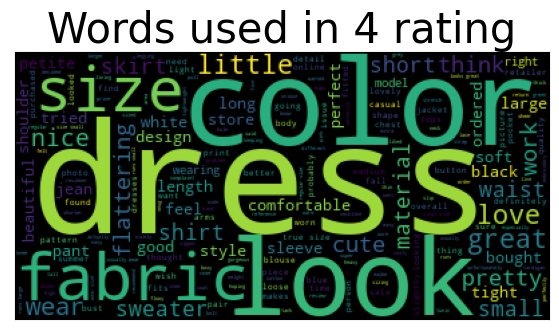

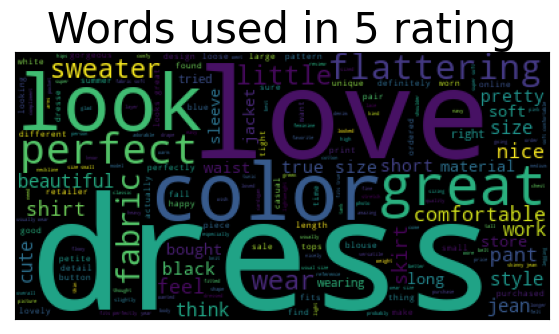

In [106]:
for ratings in range(0,5):
    values = sorted(women_df["Rating"].unique())
    specific_value= values[ratings]
    dataset = women_df[women_df["Rating"]==specific_value]
    list_ = dataset["Post_Cleaned_Reviews"].tolist()
    #print(list_)
    sentence = "".join(list_)
    #print(sentence)
    plt.figure(figsize=(40,20))
    ax = plt.subplot(1,5,1+ratings)
    plt.imshow(WordCloud().generate(sentence))
    plt.title("Words used in " + str(specific_value) + " rating", fontsize=30)
    plt.xticks([]);
    plt.yticks([]);
    fig.patch.set_facecolor(inside_color)
    ax.set_facecolor(around_color)

In [107]:
def create_age_groups(age):
    if age>0 and age<14:
        return "Children"
    elif age >=14 and age <24:
        return "Teen"
    elif age>=24 and age <64:
        return "Adult"
    else:
        return "Senior"

In [108]:
women_df["Age Group"]= women_df["Age"].apply(lambda x:create_age_groups(x))

# **Words used by Different Age Groups**

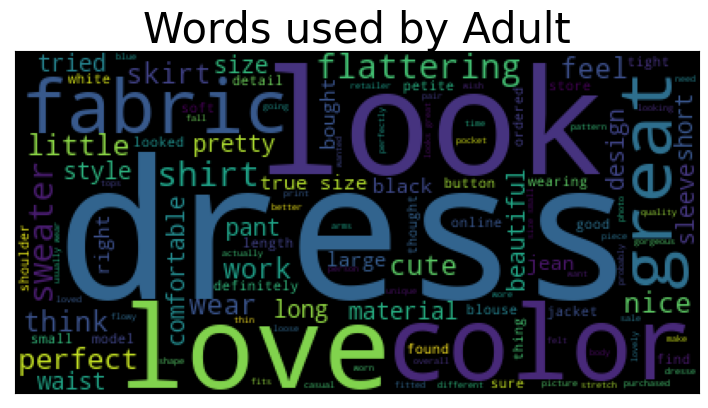

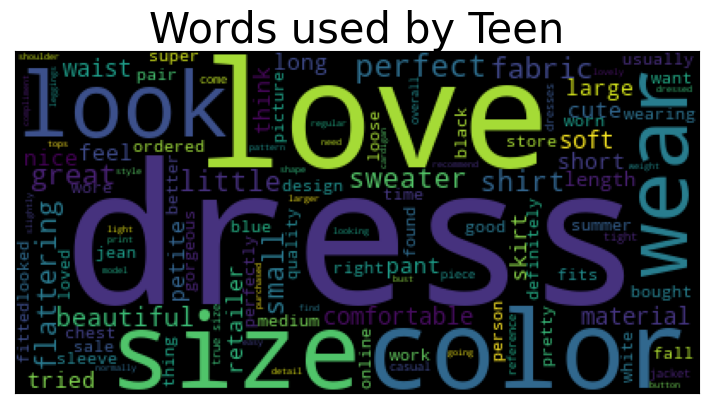

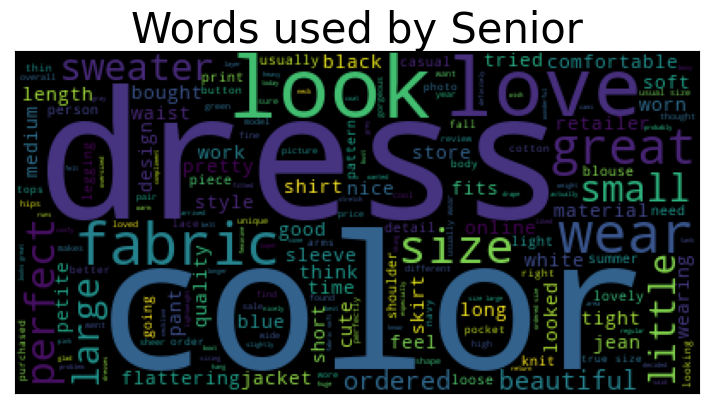

In [109]:
for age in range(0,3):
    unique_values = list(women_df["Age Group"].unique())
    specific_age = unique_values[age]
    dataset = women_df[women_df["Age Group"]==specific_age]
    age_list = dataset["Post_Cleaned_Reviews"].tolist()
    sentence = "".join(age_list)
    plt.figure(figsize=(30,15))
    plt.subplot(1,3,1+age)
    plt.imshow(WordCloud().generate(sentence))
    plt.title("Words used by " + str(specific_age), fontsize=30)
    plt.xticks([]);
    plt.yticks([]);
    fig.patch.set_facecolor(inside_color)
    ax.set_facecolor(around_color)

In [110]:
pd.set_option('display.max_rows', 100)

# **Final Results**

In [111]:
women_df[["Review Text","Sentiment Tag","Emotions_Label","Aspects"]].head(100)

,Review Text,Sentiment Tag,Emotions_Label,Aspects
2,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - ...",Positive,nervousness,flaw somewhat cheap
3,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",Positive,love,
4,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,Positive,love,cardigan very flattering
5,"I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress.",Positive,love,skirt very full
6,"I aded this in my basket at hte last mintue to see what it would look like in person. (store pick up). i went with teh darkler color only because i am so pale :-) hte color is really gorgeous, and turns out it mathced everythiing i was trying on with it prefectly. it is a little baggy on me and hte xs is hte msallet size (bummer, no petite). i decided to jkeep it though, because as i said, it matvehd everything. my ejans, pants, and the 3 skirts i waas trying on (of which i ]kept all ) oops.",Positive,admiration,color really gorgeous
7,"I ordered this in carbon for store pick up, and had a ton of stuff (as always) to try on and used this top to pair (skirts and pants). everything went with it. the color is really nice charcoal with shimmer, and went well with pencil skirts, flare pants, etc. my only compaint is it is a bit big, sleeves are long and it doesn't go in petite. also a bit loose for me, but no xxs... so i kept it and wil ldecide later since the light color is already sold out in hte smallest size...",Negative,neutral,sleeves really nice
8,I love this dress. i usually get an xs but it runs a little snug in bust so i ordered up a size. very flattering and feminine with the usual retailer flair for style.,Positive,love,very flattering
9,"I'm 5""5' and 125 lbs. i ordered the s petite to make sure the length wasn't too long. i typically wear an xs regular in retailer dresses. if you're less busty (34b cup or smaller), a s petite will fit you perfectly (snug, but not tight). i love that i could dress it up for a party, or down for work. i love that the tulle is longer then the fabric underneath.",Positive,love,tulle less busty
10,Dress runs small esp where the zipper area runs. i ordered the sp which typically fits me and it was very tight! the material on the top looks and feels very cheap that even just pulling on it will cause it to rip the fabric. pretty disappointed as it was going to be my christmas dress this year! needless to say it will be going back.,Positive,disappointment,area pretty disappointed
12,"More and more i find myself reliant on the reviews written by savvy shoppers before me and for the most past, they are right on in their estimation of the product. in the case of this dress-if it had not been for the reveiws-i doubt i would have even tried this. the dress is beautifully made, lined and reminiscent of the old retailer quality. it is lined in the solid periwinkle-colored fabric that matches the outer fabric print. tts and very fo